Test the Logistic Regression model

Import the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load the Data
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')
# Data Preprocessing
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate Independent and Dependent Variables
X = data.drop('Outcome', axis=1)  
y = data['Outcome']  

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



(614, 8) (154, 8)
(614,) (154,)


Create and Train the Logistics Regression Model

In [3]:
model_lr = LogisticRegression(max_iter=1000) 

# Model training
model_lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [4]:
y_pred_lr = model_lr.predict(X_test)


Logistic Regression - Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



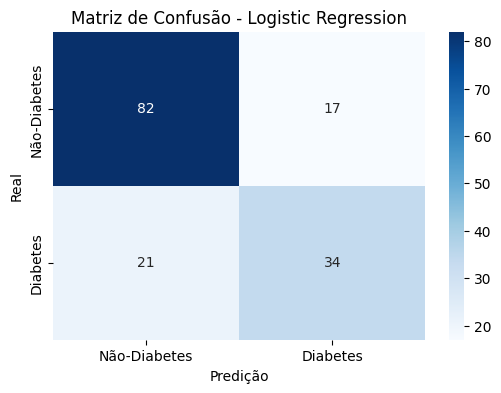

In [5]:
# Calculate model accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr}")

# View the ranking report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-Diabetes', 'Diabetes'], yticklabels=['Não-Diabetes', 'Diabetes'])
plt.title('Matriz de Confusão - Logistic Regression')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic Regression (GridSearch) - Accuracy: 0.7532467532467533
Classification Report (Optimized Logistic Regression):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



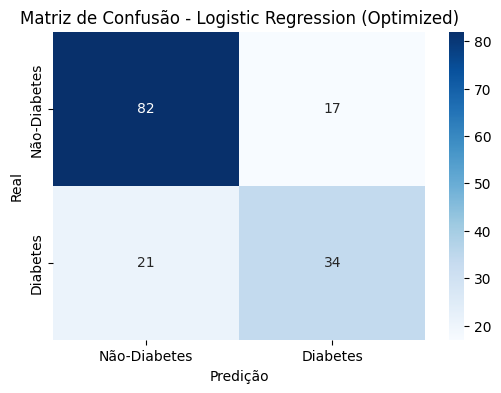

Melhores hiperparâmetros encontrados:
{'model__C': 1, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create the Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LogisticRegression(max_iter=1000)) 
])

# Define the search space for GridSearch
param_grid = {
    'model__C': [0.1, 1, 10],  
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear'],
    'model__class_weight': ['balanced', None]
}

# Configure and run GridSearch within the Pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

#  Evaluate the best model found
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Accuracy of the optimized model
accuracy_lr_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Logistic Regression (GridSearch) - Accuracy: {accuracy_lr_optimized}")

print("Classification Report (Optimized Logistic Regression):")
print(classification_report(y_test, y_pred_optimized))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-Diabetes', 'Diabetes'], yticklabels=['Não-Diabetes', 'Diabetes'])
plt.title('Matriz de Confusão - Logistic Regression (Optimized)')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Display the best hyperparameters
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)



Média da Acurácia com Validação Cruzada: 0.7579067990832696
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



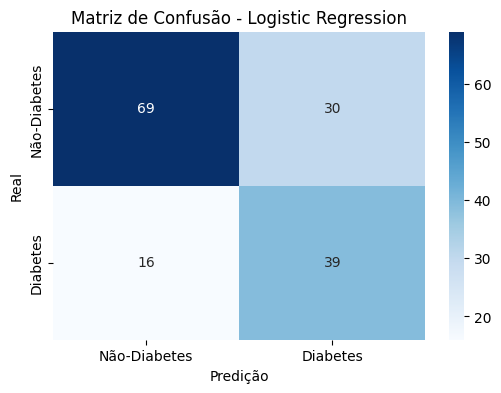

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross Validation
cv_scores = cross_val_score(model_lr, X, y, cv=5)  
print(f'Média da Acurácia com Validação Cruzada: {cv_scores.mean()}')

# View the ranking report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-Diabetes', 'Diabetes'], yticklabels=['Não-Diabetes', 'Diabetes'])
plt.title('Matriz de Confusão - Logistic Regression')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()


Logistic Regression - Accuracy: 0.7012987012987013
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154



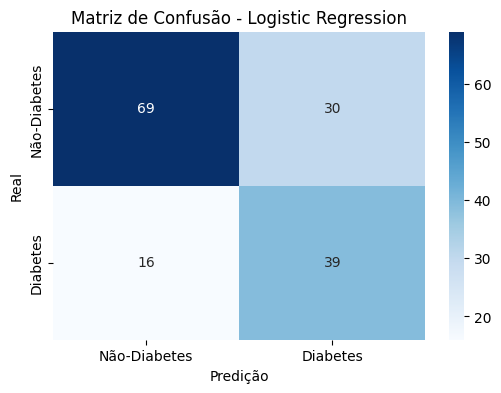

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')

# Pre-processing
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate independent and dependent variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Division between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Nnormalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Logistic Regression model with hyperparameter adjustment
model_lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# Model training
model_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = model_lr.predict(X_test)

# Model accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr}")

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não-Diabetes', 'Diabetes'], yticklabels=['Não-Diabetes', 'Diabetes'])
plt.title('Matriz de Confusão - Logistic Regression')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Base model (without optimization)
model_lr_baseline = LogisticRegression(max_iter=1000)
model_lr_baseline.fit(X_train, y_train)
y_pred_baseline = model_lr_baseline.predict(X_test)

report_baseline = classification_report(y_test, y_pred_baseline, output_dict=True)
accuracy_lr_baseline = accuracy_score(y_test, y_pred_baseline)

# GridSearch Model
y_pred_optimized = best_model.predict(X_test)  
report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)
accuracy_lr_optimized = accuracy_score(y_test, y_pred_optimized)

# Model with balanced weights
model_lr_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_lr_balanced.fit(X_train, y_train)
y_pred_balanced = model_lr_balanced.predict(X_test)
report_balanced = classification_report(y_test, y_pred_balanced, output_dict=True)
accuracy_lr_balanced = accuracy_score(y_test, y_pred_balanced)

# Cross Validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model_lr_baseline, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_f1_cv = np.mean(cv_results['test_f1'])

# Organize results in a DataFrame
results = {
    'Modelo': ['Regressão Logística (Base)', 'Regressão Logística (GridSearch)', 'Regressão Logística (Pesos Balanceados)', 'Regressão Logística (Validação Cruzada)'],
    'Acurácia': [accuracy_lr_baseline, accuracy_lr_optimized, accuracy_lr_balanced, mean_accuracy_cv],
    'Precision (Não-Diabetes)': [report_baseline['0']['precision'], report_optimized['0']['precision'], report_balanced['0']['precision'], mean_precision_cv],
    'Recall (Não-Diabetes)': [report_baseline['0']['recall'], report_optimized['0']['recall'], report_balanced['0']['recall'], mean_recall_cv],
    'F1-Score (Não-Diabetes)': [report_baseline['0']['f1-score'], report_optimized['0']['f1-score'], report_balanced['0']['f1-score'], mean_f1_cv],
    'Precision (Diabetes)': [report_baseline['1']['precision'], report_optimized['1']['precision'], report_balanced['1']['precision'], mean_precision_cv],
    'Recall (Diabetes)': [report_baseline['1']['recall'], report_optimized['1']['recall'], report_balanced['1']['recall'], mean_recall_cv],
    'F1-Score (Diabetes)': [report_baseline['1']['f1-score'], report_optimized['1']['f1-score'], report_balanced['1']['f1-score'], mean_f1_cv],
}

results_df = pd.DataFrame(results)

print(results_df)


                                    Modelo  Acurácia  \
0               Regressão Logística (Base)  0.753247   
1         Regressão Logística (GridSearch)  0.753247   
2  Regressão Logística (Pesos Balanceados)  0.701299   
3  Regressão Logística (Validação Cruzada)  0.772176   

   Precision (Não-Diabetes)  Recall (Não-Diabetes)  F1-Score (Não-Diabetes)  \
0                  0.796117               0.828283                 0.811881   
1                  0.796117               0.828283                 0.811881   
2                  0.811765               0.696970                 0.750000   
3                  0.726557               0.563522                 0.633576   

   Precision (Diabetes)  Recall (Diabetes)  F1-Score (Diabetes)  
0              0.666667           0.618182             0.641509  
1              0.666667           0.618182             0.641509  
2              0.565217           0.709091             0.629032  
3              0.726557           0.563522             0.63

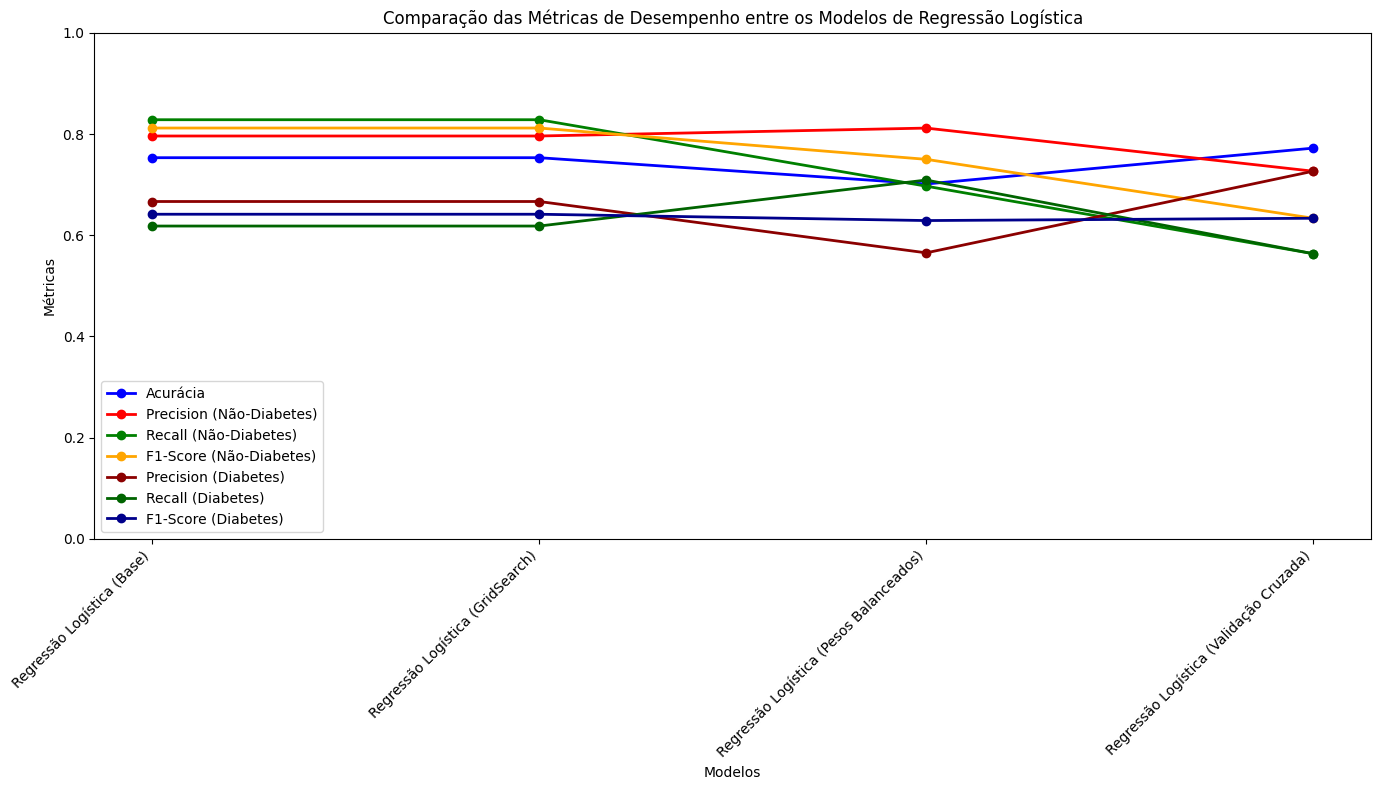

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define already calculated metrics
models = ['Regressão Logística (Base)', 'Regressão Logística (GridSearch)', 'Regressão Logística (Pesos Balanceados)', 'Regressão Logística (Validação Cruzada)']

# Accuracy for each model
acuracia = [accuracy_lr_baseline, accuracy_lr_optimized, accuracy_lr_balanced, mean_accuracy_cv]

# Precision, Recall and F1-Score for the Non-Diabetes class (0)
precision_0 = [report_baseline['0']['precision'], report_optimized['0']['precision'], report_balanced['0']['precision'], mean_precision_cv]
recall_0 = [report_baseline['0']['recall'], report_optimized['0']['recall'], report_balanced['0']['recall'], mean_recall_cv]
f1_0 = [report_baseline['0']['f1-score'], report_optimized['0']['f1-score'], report_balanced['0']['f1-score'], mean_f1_cv]

# Precision, Recall and F1-Score for the Diabetes class (1)
precision_1 = [report_baseline['1']['precision'], report_optimized['1']['precision'], report_balanced['1']['precision'], mean_precision_cv]
recall_1 = [report_baseline['1']['recall'], report_optimized['1']['recall'], report_balanced['1']['recall'], mean_recall_cv]
f1_1 = [report_baseline['1']['f1-score'], report_optimized['1']['f1-score'], report_balanced['1']['f1-score'], mean_f1_cv]

plt.figure(figsize=(14, 8))

plt.plot(models, acuracia, marker='o', label='Acurácia', color='blue', linestyle='-', linewidth=2)

plt.plot(models, precision_0, marker='o', label='Precision (Não-Diabetes)', color='red', linestyle='-', linewidth=2)

plt.plot(models, recall_0, marker='o', label='Recall (Não-Diabetes)', color='green', linestyle='-', linewidth=2)

plt.plot(models, f1_0, marker='o', label='F1-Score (Não-Diabetes)', color='orange', linestyle='-', linewidth=2)

plt.plot(models, precision_1, marker='o', label='Precision (Diabetes)', color='darkred', linestyle='-', linewidth=2)

plt.plot(models, recall_1, marker='o', label='Recall (Diabetes)', color='darkgreen', linestyle='-', linewidth=2)

plt.plot(models, f1_1, marker='o', label='F1-Score (Diabetes)', color='darkblue', linestyle='-', linewidth=2)

plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.title('Comparação das Métricas de Desempenho entre os Modelos de Regressão Logística')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  
plt.legend()


plt.tight_layout()
plt.show()
